# Вариант 1. (простой)

## 1. обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете fashion-mnist

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train_4d = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_4d = x_test.reshape(x_test.shape[0], 28, 28, 1)

## 2. оценить рост точности при увеличении ширины сети (больше ядер)

1 accurasy:
	Train: 0.7012333273887634
	Test: 0.6973000168800354
2 accurasy:
	Train: 0.7586166858673096
	Test: 0.7494000196456909
4 accurasy:
	Train: 0.8060166835784912
	Test: 0.7997999787330627
8 accurasy:
	Train: 0.8507000207901001
	Test: 0.838100016117096
16 accurasy:
	Train: 0.8665000200271606
	Test: 0.852400004863739
32 accurasy:
	Train: 0.8873833417892456
	Test: 0.8666999936103821
64 accurasy:
	Train: 0.8801666498184204
	Test: 0.8582000136375427


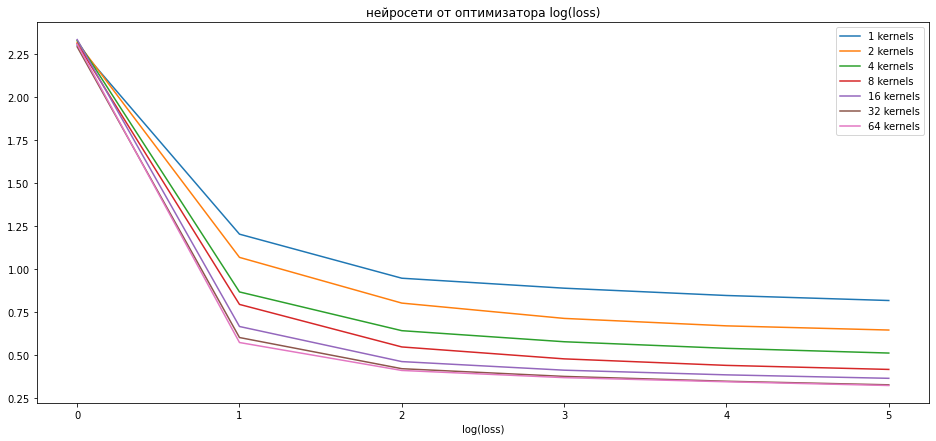

In [3]:
epochs = 5
epoch = np.arange(epochs+1)

plt.figure(figsize=(16,7))

for kernels in (1, 2, 4, 8, 16, 32, 64):

  # build
  model = Sequential([
      Conv2D(kernels, kernel_size=(7, 7), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),
      AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
      Conv2D(kernels, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid'),

      Flatten(),
      Dense(64, activation='tanh'),
      Dense(10, activation='softmax')
  ])

  # compile
  model.compile(loss=categorical_crossentropy, 
                optimizer='nadam', 
                metrics=["accuracy"])
  
  # calc errors
  hh0_train = model.evaluate(x_train_4d, y_train, verbose=0)

  # fitting
  hh_train = model.fit(x_train_4d, y_train, 
                      epochs=epochs, 
                      batch_size=32, 
                      validation_split=0.2, 
                      validation_data=(x_test_4d, y_test), 
                      verbose=0)
  
  hh1_train = model.evaluate(x_train_4d, y_train, verbose=0)
  hh_test = model.evaluate(x_test_4d, y_test, verbose=0)

  print(f"{kernels} accurasy:")
  print(f"\tTrain: {hh1_train[1]}")
  print(f"\tTest: {hh_test[1]}")

  plt.plot(epoch, [hh0_train[0]] + hh_train.history['loss'], label=f'{kernels} kernels')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

### Вывод:
- даже при количестве ядер = 1, наблюдается повышение точности
- количество ядер - 32 и 64 почти не различаются по точности на test

## 3. оценить рост точности при увеличении глубины сети (больше слоев)

In [4]:
# build
one_layers_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),

    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

two_layers_model = Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),
    AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid'),

    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

three_layers_model = Sequential([
    Conv2D(32, kernel_size=(7, 7), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),
    AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid'),

    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

64 accurasy:
	Train: 0.9040499925613403
	Test: 0.86080002784729
64 accurasy:
	Train: 0.8823500275611877
	Test: 0.8629999756813049
64 accurasy:
	Train: 0.8731666803359985
	Test: 0.8565000295639038


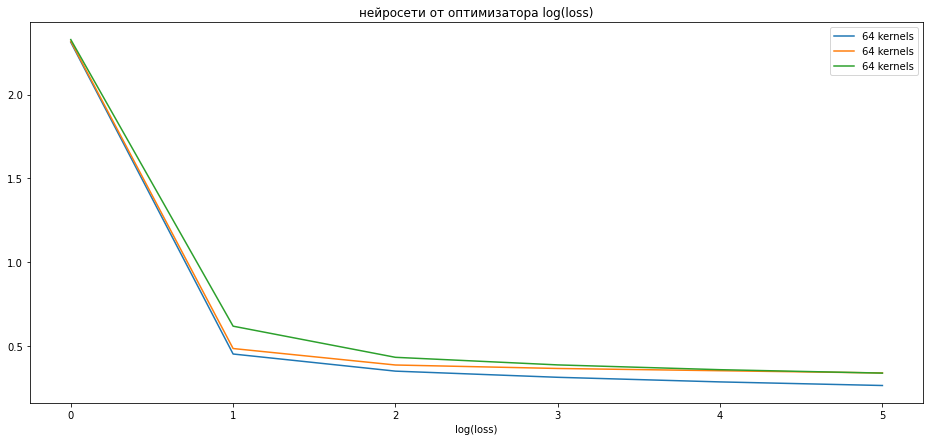

In [5]:
plt.figure(figsize=(16,7))

for model in (one_layers_model, two_layers_model, three_layers_model):

  # compile
  model.compile(loss=categorical_crossentropy, 
                optimizer='nadam', 
                metrics=["accuracy"])
  
  # calc errors
  hh0_train = model.evaluate(x_train_4d, y_train, verbose=0)

  # fitting
  hh_train = model.fit(x_train_4d, y_train, 
                      epochs=epochs, 
                      batch_size=32, 
                      validation_split=0.2, 
                      validation_data=(x_test_4d, y_test), 
                      verbose=0)
  
  hh1_train = model.evaluate(x_train_4d, y_train, verbose=0)
  hh_test = model.evaluate(x_test_4d, y_test, verbose=0)

  print(f"{kernels} accurasy:")
  print(f"\tTrain: {hh1_train[1]}")
  print(f"\tTest: {hh_test[1]}")

  plt.plot(epoch, [hh0_train[0]] + hh_train.history['loss'], label=f'{kernels} kernels')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

### Вывод:
- С увеличением числа слоев точность падала

0 accurasy:
	Train: 0.8792999982833862
	Test: 0.8636999726295471
1 accurasy:
	Train: 0.8787833452224731
	Test: 0.8611000180244446
2 accurasy:
	Train: 0.8852499723434448
	Test: 0.867900013923645
3 accurasy:
	Train: 0.8795166611671448
	Test: 0.8658999800682068
4 accurasy:
	Train: 0.8796166777610779
	Test: 0.8633999824523926
5 accurasy:
	Train: 0.8816666603088379
	Test: 0.8659999966621399
6 accurasy:
	Train: 0.8766999840736389
	Test: 0.859499990940094
7 accurasy:
	Train: 0.8859999775886536
	Test: 0.8676999807357788
8 accurasy:
	Train: 0.8800666928291321
	Test: 0.8639000058174133
9 accurasy:
	Train: 0.8861333131790161
	Test: 0.8707000017166138


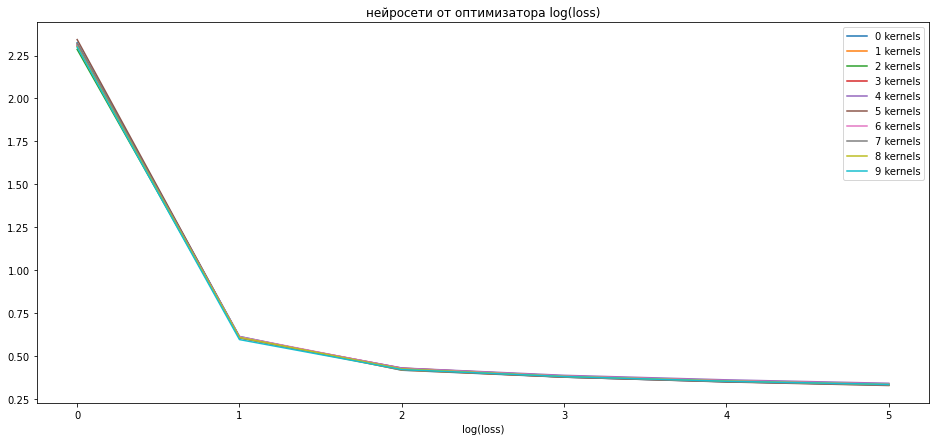

In [6]:
epochs = 5
epoch = np.arange(epochs+1)

plt.figure(figsize=(16,7))

for kernels in range(10):

  # build
  model = Sequential([
      Conv2D(32, kernel_size=(7, 7), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),
      AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
      Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      AveragePooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
      Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid'),

      Flatten(),
      Dense(64, activation='tanh'),
      Dense(10, activation='softmax')
  ])

  # compile
  model.compile(loss=categorical_crossentropy, 
                optimizer='nadam', 
                metrics=["accuracy"])
  
  # calc errors
  hh0_train = model.evaluate(x_train_4d, y_train, verbose=0)

  # fitting
  hh_train = model.fit(x_train_4d, y_train, 
                      epochs=epochs, 
                      batch_size=32, 
                      validation_split=0.2, 
                      validation_data=(x_test_4d, y_test), 
                      verbose=0)
  
  hh1_train = model.evaluate(x_train_4d, y_train, verbose=0)
  hh_test = model.evaluate(x_test_4d, y_test, verbose=0)

  print(f"{kernels} accurasy:")
  print(f"\tTrain: {hh1_train[1]}")
  print(f"\tTest: {hh_test[1]}")

  plt.plot(epoch, [hh0_train[0]] + hh_train.history['loss'], label=f'{kernels} kernels')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

## 4. сравнить с точностью полносвязной сети для этой выборки

### Полносвязная сеть с предидущей дз:
nadam optimizer, accurasy:
- Train: 0.8793500065803528
- Test: 0.8647000193595886

### Вывод:
Здесь видно, что разница между сверточной и полносвязной сетью не большая

# Вариант 2. (сложный)
1. реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
2. оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
3. оценить рост точности при увеличении глубины сети (больше слоев)